<a href="https://colab.research.google.com/github/carolstsz/datascience_beginning/blob/master/Airbnb_Roma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados do Airbnb - Roma, Itália
O Airbnb já é considerada a maior empresa hoteleira da atualidade mesmo **sem possuir nenhum hotel**.

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.


Uma das iniciativas do Airbnb é disponibilizar dados do site para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de Data Science.

Nesse projeto iremos analisar os dados referentes à **Roma**, na Itália, para conhecer melhor a base de dados e extrair possíveis insights.


### Roma - Itália

Conhecida pela gastronomia e uma grande concentração de pontos turísticos, a capital da Itália, abriga momumentos históricos e arquitetônicos como o **Coliseu**, o **Pantheon**, o **Fórum Romano** e a **Fonte de Trevi**. 

Além de ser a maior e mais populosa cidade da Itália, estima-se que Roma receba, em média, de 8 a 10 milhões de turistas por ano. Sendo um dos destinos mais visitados do mundo.

<img src='https://www.taporonde.com/wp-content/uploads/2019/09/dicas_de_roma-ta_por_onde-1-740x387.jpg'>

## Obtendo Dados

Os dados utilizados aqui são públicos e foram obtidos através do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).


In [ ]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importar o arquivo para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/italy/lazio/rome/2020-05-15/visualisations/listings.csv")

### Análise dos Dados

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Dicionário das variáveis**

* `id` - Número de identificação do imovél.
* `name` - Nome do estabelecimento, propriedade.
* `host_id` - Número de identificação do anfitrião.
* `host_name` - Nome do anfitrião.
* `neighbourhood_group` - 'sem valores válidos'.
* `neighbourhood` - Nome do bairro.
* `latitude` - Coordenada de latitude da propriedade.
* `longitude` - Coordenada de longitude da propriedade.
* `room_type` - Tipo de quarto oferecido/ ou imóvel inteiro.
* `price` - Preço do aluguel.
* `minimum_nights` - Quantidade minima de noites para a reserva.
* `number_of_reviews` - Total de comentários sobre o imóvel.
* `last_review` - Data do último comentário.
* `reviews_per_month` - Número de comentários por mês.
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo anfitrião.
* `availability_365` - Número de dias disponíveis dentro de 365 dias.
											

## Verificando quantos atributos (variáveis) e quantas entradas o dataset possui.

In [ ]:
df.shape

(30895, 16)

In [ ]:
print("Variaveis:\t {}".format(df.shape[1]))
print("Entradas:\t {}".format(df.shape[0]))

Variaveis:	 16
Entradas:	 30895


## Quantidade de dados ausentes por variável

In [ ]:
# dados ausentes por variável em ordem decrescente
df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               30895
reviews_per_month                  6234
last_review                        6234
host_name                            87
name                                 10
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
id                                    0
dtype: int64

In [ ]:
# percentual de dados ausentes por variável em ordem decrescente
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.201780
last_review                       0.201780
host_name                         0.002816
name                              0.000324
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

## Distribuição das variáveis

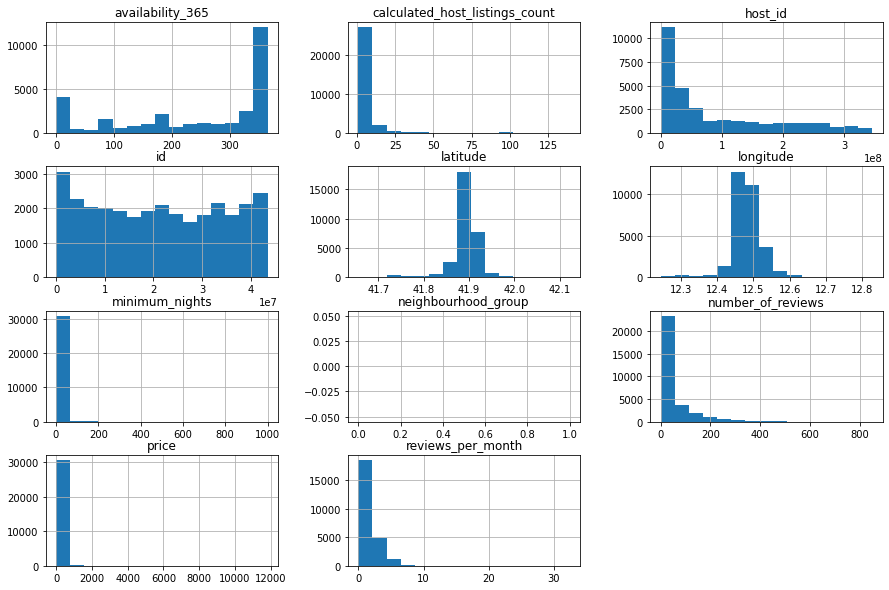

In [ ]:
# histograma das variáveis numéricas
df.hist(bins=15,figsize=(15,10));

## Há *outliers* presentes?
Normalmente *outliers* são definidos como valores atípicos ou discrepantes que podem prejudicar a interpretação dos dados.

Nesse conjunto de dados existem indícios de presença de *outliers*. Ao verificar a distribuição do histograma de variáveis como `price`, `minimum_nights` e `calculated_host_listings_count`, por exemplo, vemos uma distorção na apresentação dos dados, que não seguem uma distribuição.

In [ ]:
# utilizando o método .describe() para verificar um resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,30895.000000,30895.000000,30895.000000,24661.000000,30895.000000,30895.000000
mean,111.802395,3.128532,42.762065,1.416956,7.140217,239.423887
std,278.294933,15.291493,69.854810,1.490400,16.693097,131.955367
min,3.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,50.000000,1.000000,1.000000,0.260000,1.000000,137.000000
50%,75.000000,2.000000,11.000000,0.890000,2.000000,299.000000
75%,115.000000,3.000000,55.000000,2.160000,6.000000,359.000000
max,11818.000000,1000.000000,850.000000,32.420000,139.000000,365.000000


Pelo resumo estatístico acima podemos concluir 

*   A variável `price`tem 75% dos seus valores abaixo de € 115.00 e seu valor máximo é € 11818.00 
*  Para metade dos dados a quantidade mínima de noites (`minimum_nights`) é de 2 dias por estadia. Entretanto, o valor máximo dessa variável está acima do limite real de 365 dias no ano.
*  A variável calculated_host_listings_count (quantidade de imóveis do mesmo anfitrião) tem 75% de seu valor abaixo de 6, enquanto o valor máximo é de 139.



### Boxplot para `price`

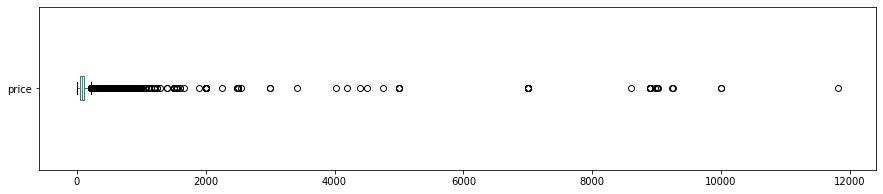


Limite superior - Z score: 946.6872

Outliers estimados com Z score
197 entries
0.6376%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# outliers - Z score
lim_sup = df.price.mean() + (3*df.price.std())

print("\nLimite superior - Z score: {:.4f}".format(lim_sup))
print("\nOutliers estimados com Z score")
print("{} entries".format(len(df[df.price > lim_sup])))
print("{:.4f}%".format((len(df[df.price > lim_sup]) / df.shape[0])*100))


### Boxplot para `minimum_nights`

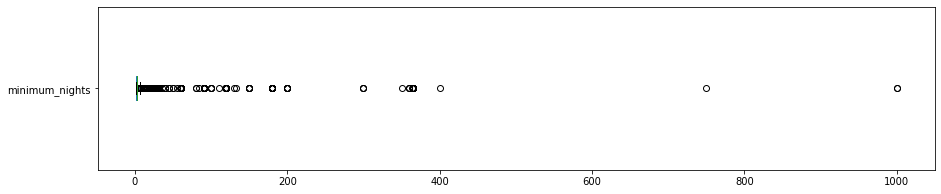


Limite superior - Z score: 49.0030

Outliers estimados com Z score
145 entradas
0.4693%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# outliers - Z score
lim_sup2 = df.minimum_nights.mean() + (3*df.minimum_nights.std())

# summary of estimation
print("\nLimite superior - Z score: {:.4f}".format(lim_sup2))
print("\nOutliers estimados com Z score")
print("{} entradas".format(len(df[df.minimum_nights > lim_sup2])))
print("{:.4f}%".format((len(df[df.minimum_nights > lim_sup2]) / df.shape[0])*100))


### Histograma sem outliers

Após essa análise das variáveis `price` e `minimum_nights`, vamos fazer a limpeza do DataFrame para eliminar os outliers e plotar novamente o histograma.

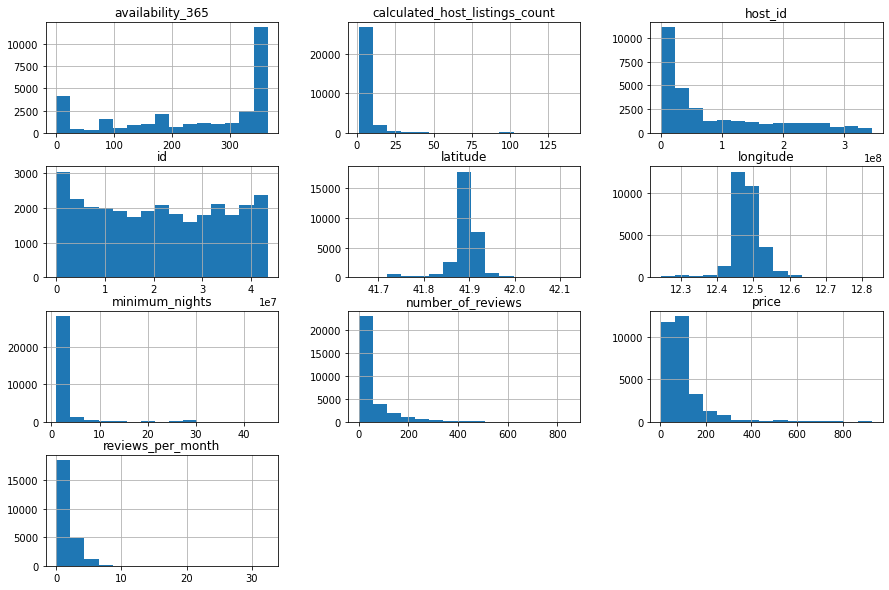

In [ ]:
# criando um novo data frame pra eliminar outliers 
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > lim_sup].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > lim_sup2].index, axis=0, inplace=True)


# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Remover outliers é sempre uma tarefa complicada. Nesse projeto foi feita apenas essa análise univariada utilizando Z score. Mas importante ressaltar que existem outras técnicas que podem ser aplicadas. 

De toda forma, vamos analisar como a remoção desses valores discrepantes afetaram as variáveis `price` e `minimum_nights`. 


In [ ]:
print('Preço médio da diária: {:.2f}'.format(df.price.mean()))
print('Preço médio da diária após remover outliers: {:.2f}'.format(df_clean.price.mean()))
print('\n')
print('Média de qtd. mínima de noites: {:.2f}'.format(df.minimum_nights.mean()))
print('Média de qtd. mínima de noites após remover outliers: {:.2f}'.format(df_clean.minimum_nights.mean()))


Preço médio da diária: 111.80
Preço médio da diária após remover outliers: 98.02


Média de qtd. mínima de noites: 3.13
Média de qtd. mínima de noites após remover outliers: 2.38


## Qual a correlação existente entre as variáveis?

Para identificar a intensidade do coeficiente de correlação existente entre as variáveis de interesse, vamos:

*   Criar uma matriz de correlação
*   Gerar um *heatmap* a partir dessa matriz, usando a biblioteca seaborn


In [ ]:
# criar uma matriz de correlação
corr=df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.029236,-0.077350,-0.060386,0.128120,0.111574
minimum_nights,-0.029236,1.000000,-0.035498,-0.069891,-0.006062,-0.023954
number_of_reviews,-0.077350,-0.035498,1.000000,0.782764,-0.063665,0.100652
reviews_per_month,-0.060386,-0.069891,0.782764,1.000000,-0.054113,0.059224
calculated_host_listings_count,0.128120,-0.006062,-0.063665,-0.054113,1.000000,0.004523
availability_365,0.111574,-0.023954,0.100652,0.059224,0.004523,1.000000


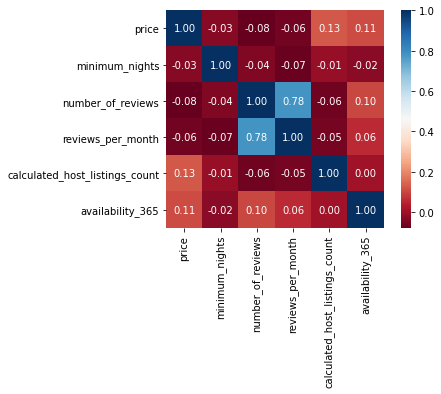

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

## Qual tipo de imóvel mais alugado?

A variável `room_type` indica o tipo de locação anunciada no Airbnb. O usuário tem a opção de alugar o local inteiro, somente um quarto do local, quartos em hotéis ou quartos compartilhados.

Vamos verificar a quantidade de cada tipo de aluguel utilizando o método 
`value_counts()`

In [ ]:
df_clean.room_type.value_counts()

Entire home/apt    19606
Private room        9222
Hotel room          1479
Shared room          247
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]*100

Entire home/apt    64.168358
Private room       30.182627
Hotel room          4.840610
Shared room         0.808405
Name: room_type, dtype: float64

Com as informações desse dataset podemos verificar que os quartos compartilhados (`shared room`) e os quartos de hotel (`hotel room`) correspondem a menos de 6% dos imóveis disponíveis. 

Existe uma oferta muito maior de casas/apartamentos inteiros e também quartos privados. Isso pode ser devido uma preferência dos usuários por privacidade mas também pode indicar uma demanda que não tem sido atendida pelo Airbnb. 

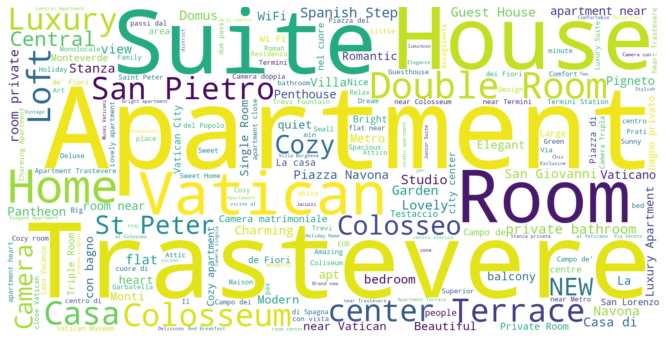

In [ ]:
from wordcloud import WordCloud, STOPWORDS
text = " ".join(str(each) for each in df.name)
# Create and generate a word cloud image:
stopwords = set(STOPWORDS)
stopwords.update(['Roma','Appartamento', 'Di Roma','Rome'])
wordcloud = WordCloud(stopwords = stopwords,max_words=200, 
                      width=1600, height=800,background_color="white").generate(text)
plt.figure(figsize=(12,6))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

A wordcloud mostra as palavras mais usadas no nome das acomodações. Normalmente o nome é uma breve descrição do local somado a algo que seja atrativo para o usuário. Então podemos perceber que **Trastevere** é uma palavra bem citada, provavelmente por ser a região boêmia de Roma, muito procurada por turistas. Outros pontos turísticos também aparecem na nuvem de palavras, como **Coliseu** e **Vaticano**. Além disso, descrições físicas acerca da acomodação como apartamento, suíte, quarto e banheiro privativo também são bem utilizadas pelo hosts ao fazer o cadastro do local no aplicativo.

## Qual a localidade mais cara do conjunto de dados?

Vamos comparar os preços dos alugueis por bairro para identificar os locais mais caros de Roma. 

Para isso, utilizaremos o método `groupby()`.

In [ ]:
#ver preço médio por localidade
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
I Centro Storico              120.531285
IX Eur                         94.978667
XIII Aurelia                   87.729312
XV Cassia/Flaminia             86.516014
II Parioli/Nomentano           82.101518
XII Monte Verde                77.165404
XIV Monte Mario                73.603279
X Ostia/Acilia                 69.905120
VII San Giovanni/Cinecittà     67.783626
VIII Appia Antica              67.312572
Name: price, dtype: float64

In [ ]:
#ver quantidade de imóveis no I Centro Storico e a porcentagem em relação ao total de imóveis
print("{} entradas".format(len(df_clean[df_clean.neighbourhood == "I Centro Storico"].index)))
print("{:.4f}%".format((len(df_clean[df_clean.neighbourhood == "I Centro Storico"].index) / df.shape[0])*100))

16046 entradas
51.9372%


Conforme o esperado, o Centro Histórico é o local com mais imóveis para serem alugados (quase 52% do total) e também é o local com maior preço médio, provavelmente pela proximidade dos pontos turísticos.


## Scatter plot

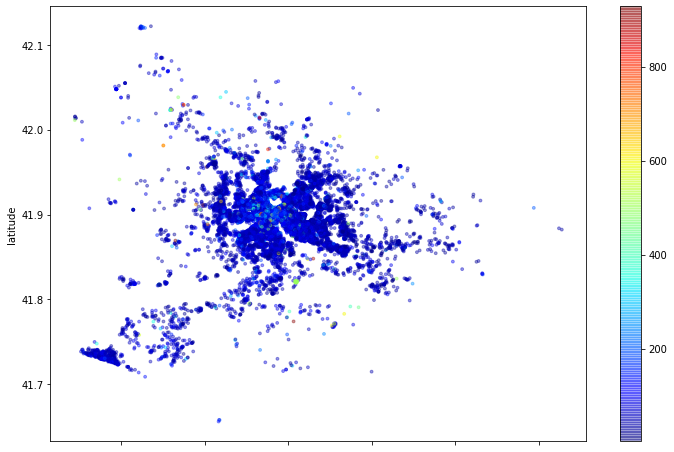

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusão

Nesse projeto foi feita apenas uma análise superficial na base de dados do Airbnb para a cidade de Roma, porém já foi possível identificar que existem *outliers* em algumas das variáveis.

Verificou-se também que existe uma concentração de imóveis em bairros históricos e que essa região é a mais cara.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.